In [ ]:
# pandas to open data files & processing it.
import pandas as pd
# to see all columns
pd.set_option('display.max_columns', None)
# To see whole text
pd.set_option('max_colwidth', 100)

# numpy for numeric data processing
import numpy as np

# keras for deep learning model creation
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Flatten, Bidirectional, GlobalMaxPool1D
from keras.models import Model
from keras.utils import plot_model

# to fix random seeds
import random
import tensorflow as tf
import torch
import os

# Regular Expression for text cleaning
import re

# to track the progress - progress bar
from tqdm.notebook import tqdm


In [4]:
sarcasm_data = pd.read_csv('/content/drive/MyDrive/train-balanced-sarcasm.csv')
print(sarcasm_data.shape)
sarcasm_data.head()

(1010826, 10)


,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
0,0,NC and NH.,Trumpbart,politics,2,-1,-1,2016-10,2016-10-16 23:55:23,"Yeah, I get that argument. At this point, I'd prefer is she lived in NC as well."
1,0,You do know west teams play against west teams more than east teams right?,Shbshb906,nba,-4,-1,-1,2016-11,2016-11-01 00:24:10,The blazers and Mavericks (The wests 5 and 6 seed) did not even carry a good enough record to ma...
2,0,"They were underdogs earlier today, but since Gronk's announcement this afternoon, the Vegas line...",Creepeth,nfl,3,3,0,2016-09,2016-09-22 21:45:37,They're favored to win.
3,0,"This meme isn't funny none of the ""new york nigga"" ones are.",icebrotha,BlackPeopleTwitter,-8,-1,-1,2016-10,2016-10-18 21:03:47,deadass don't kill my buzz
4,0,I could use one of those tools.,cush2push,MaddenUltimateTeam,6,-1,-1,2016-12,2016-12-30 17:00:13,Yep can confirm I saw the tool they use for that. It was made by our boy EASports_MUT


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
sarcasm_data.drop(['author', 'subreddit', 'score', 'ups', 'downs', 'date', 'created_utc', 'parent_comment'], axis=1, inplace=True)
# remove empty rows
sarcasm_data.dropna(inplace=True)
sarcasm_data.head()

,label,comment
0,0,NC and NH.
1,0,You do know west teams play against west teams more than east teams right?
2,0,"They were underdogs earlier today, but since Gronk's announcement this afternoon, the Vegas line..."
3,0,"This meme isn't funny none of the ""new york nigga"" ones are."
4,0,I could use one of those tools.


In [6]:
sarcasm_data['label'].value_counts()

label
0    505403
1    505368
Name: count, dtype: int64

In [7]:
mispell_dict = {"ain't": "is not", "cannot": "can not", "aren't": "are not", "can't": "can not", "'cause": "because", "could've": "could have", "couldn't": "could not", "didn't": "did not",
                "doesn't": "does not",
                "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not", "he'd": "he would", "he'll": "he will", "he's": "he is", "how'd": "how did",
                "how'd'y": "how do you", "how'll": "how will", "how's": "how is", "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have", "I'm": "I am",
                "I've": "I have", "i'd": "i would", "i'd've": "i would have", "i'll": "i will", "i'll've": "i will have", "i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have", "it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have",
                "mightn't": "might not", "mightn't've": "might not have", "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not",
                "needn't've": "need not have", "o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not",
                "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have", "so's": "so as", "this's": "this is", "that'd": "that would",
                "that'd've": "that would have", "that's": "that is", "there'd": "there would", "there'd've": "there would have", "there's": "there is", "here's": "here is", "they'd": "they would",
                "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not",
                "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not",
                "what'll": "what will", "what'll've": "what will have", "what're": "what are", "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have",
                "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "wont": "will not", "won't've": "will not have", "would've": "would have",
                "wouldn't": "would not",
                "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would", "y'all'd've": "you all would have", "y'all're": "you all are", "y'all've": "you all have",
                "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have", 'colour': 'color',
                'centre': 'center', 'favourite': 'favorite', 'travelling': 'traveling', 'counselling': 'counseling', 'theatre': 'theater', 'cancelled': 'canceled', 'labour': 'labor',
                'organisation': 'organization', 'wwii': 'world war 2', 'citicise': 'criticize', 'youtu ': 'youtube ', 'Qoura': 'Quora', 'sallary': 'salary', 'Whta': 'What',
                'narcisist': 'narcissist', 'howdo': 'how do', 'whatare': 'what are', 'howcan': 'how can', 'howmuch': 'how much', 'howmany': 'how many', 'whydo': 'why do', 'doI': 'do I',
                'theBest': 'the best', 'howdoes': 'how does', 'Etherium': 'Ethereum',
                'narcissit': 'narcissist', 'bigdata': 'big data', '2k17': '2017', '2k18': '2018', 'qouta': 'quota', 'exboyfriend': 'ex boyfriend', 'airhostess': 'air hostess', "whst": 'what',
                'watsapp': 'whatsapp', 'demonitisation': 'demonetization', 'demonitization': 'demonetization', 'demonetisation': 'demonetization'}

mispell_dict = {k.lower(): v.lower() for k, v in mispell_dict.items()}

In [8]:
def preprocessing_text(s):
    # making our string lowercase & removing extra spaces
    s = str(s).lower().strip()

    # remove contractions.
    s = " ".join([mispell_dict[word] if word in mispell_dict.keys() else word for word in s.split()])

    # removing \n
    s = re.sub('\n', '', s)

    # put spaces before & after punctuations to make words seprate. Like "king?" to "king", "?".
    s = re.sub(r"([?!,+=—&%\'\";:¿।।।|\(\){}\[\]//])", r" \1 ", s)

    # Remove more than 2 continues spaces with 1 space.
    s = re.sub('[ ]{2,}', ' ', s).strip()

    return s

In [9]:
# apply preprocessing_text function
sarcasm_data['comment'] = sarcasm_data['comment'].apply(preprocessing_text)
sarcasm_data.head()

,label,comment
0,0,nc and nh.
1,0,you do know west teams play against west teams more than east teams right ?
2,0,"they were underdogs earlier today , but since gronk ' s announcement this afternoon , the vegas ..."
3,0,"this meme is not funny none of the "" new york nigga "" ones are."
4,0,i could use one of those tools.


In [10]:
# total unique words we are going to use.
TOTAL_WORDS = 40000

# max number of words one sentence can have
MAX_LEN = 50

# width of of 1D embedding vector
EMBEDDING_SIZE = 300

In [11]:
%%time
tokenizer = Tokenizer(num_words=TOTAL_WORDS)
tokenizer.fit_on_texts(list(sarcasm_data['comment']))

train_data = tokenizer.texts_to_sequences(sarcasm_data['comment'])
train_data = pad_sequences(train_data, maxlen = MAX_LEN)
target = sarcasm_data['label']

CPU times: user 46.6 s, sys: 615 ms, total: 47.2 s
Wall time: 48.4 s


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [12]:
file_path = '/content/drive/My Drive/crawl-300d-2M.vec'


In [13]:
%%time
EMBEDDING_FILE = '/content/drive/My Drive/crawl-300d-2M.vec'

def get_coefs(word, *arr): return word, np.asarray(arr, dtype='float32')

embeddings_index = dict(get_coefs(*o.rstrip().rsplit(' ')) for o in tqdm(open(EMBEDDING_FILE)))

word_index = tokenizer.word_index
nb_words = min(TOTAL_WORDS, len(word_index))
embedding_matrix = np.zeros((nb_words, EMBEDDING_SIZE))

0it [00:00, ?it/s]

CPU times: user 2min 55s, sys: 10.6 s, total: 3min 6s
Wall time: 3min 35s


In [14]:
for word, i in tqdm(word_index.items()):
    if i >= TOTAL_WORDS: continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None: embedding_matrix[i] = embedding_vector

  0%|          | 0/166508 [00:00<?, ?it/s]

In [15]:
embedding_matrix.shape

(40000, 300)

In [ ]:
'''import numpy as np
from tqdm import tqdm

# Your total vocabulary size and embedding dimension
TOTAL_WORDS = 40000
EMBEDDING_DIM = 300

# Assuming word_index and embeddings_index are already defined
# Initialize the embedding matrix
embedding_matrix = np.zeros((TOTAL_WORDS, EMBEDDING_DIM))

# Populate the embedding matrix
for word, i in tqdm(word_index.items()):
    if i >= TOTAL_WORDS:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

# Check the shape to ensure it's correct
print(f"Embedding matrix shape: {embedding_matrix.shape}")'''

100%|██████████| 18375/18375 [00:00<00:00, 105330.66it/s]

Embedding matrix shape: (40000, 300)


In [16]:
def seed_everything(seed):
    random.seed(seed)
    np.random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    tf.random.set_seed(seed)

# We fix all the random seed so that, we can reproduce the results.
seed_everything(2020)

In [17]:
input_layer = Input(shape=(MAX_LEN,))

embedding_layer = Embedding(TOTAL_WORDS, EMBEDDING_SIZE, weights = [embedding_matrix])(input_layer)

LSTM_layer = Bidirectional(LSTM(128, return_sequences = True))(embedding_layer)
maxpool_layer = GlobalMaxPool1D()(LSTM_layer)

dense_layer_1 = Dense(64, activation="relu")(maxpool_layer)
dropout_1 = Dropout(0.5)(dense_layer_1)

dense_layer_2 = Dense(32, activation="relu")(dropout_1)
dropout_2 = Dropout(0.5)(dense_layer_2)

output_layer = Dense(1, activation="sigmoid")(dropout_2)

model = Model(inputs=input_layer, outputs=output_layer)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 50)]              0         
                                                                 
 embedding (Embedding)       (None, 50, 300)           12000000  
                                                                 
 bidirectional (Bidirection  (None, 50, 256)           439296    
 al)                                                             
                                                                 
 global_max_pooling1d (Glob  (None, 256)               0         
 alMaxPooling1D)                                                 
                                                                 
 dense (Dense)               (None, 64)                16448     
                                                                 
 dropout (Dropout)           (None, 64)                0     

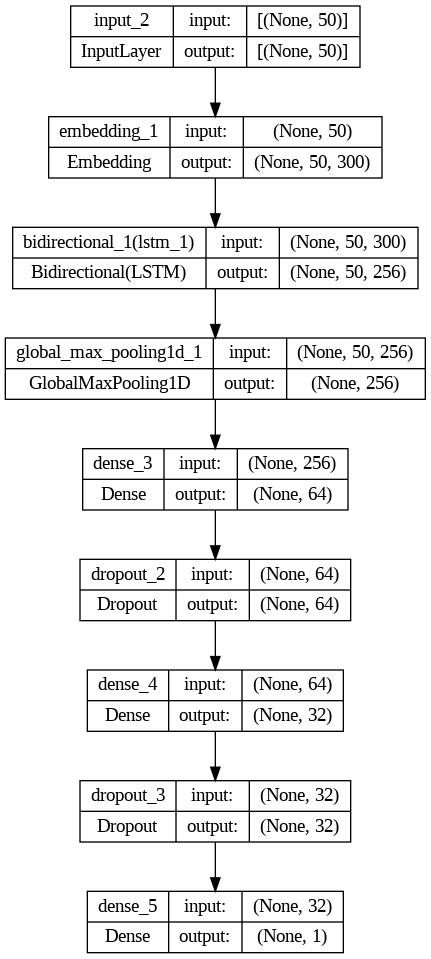

In [ ]:
plot_model(model, show_shapes=True)

In [19]:
BATCH_SIZE = 512
EPOCHS = 5

history = model.fit(
    train_data, target,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    # We are using randomly selected 20% sentences as validation data.
    validation_split=0.2
)

Epoch 1/5
1580/1580 [==============================] - 3624s 2s/step - loss: 0.5289 - accuracy: 0.7391 - val_loss: 0.5167 - val_accuracy: 0.7415
Epoch 2/5
1580/1580 [==============================] - 3702s 2s/step - loss: 0.4961 - accuracy: 0.7611 - val_loss: 0.5249 - val_accuracy: 0.7374
Epoch 3/5
1580/1580 [==============================] - 3729s 2s/step - loss: 0.4558 - accuracy: 0.7848 - val_loss: 0.5423 - val_accuracy: 0.7344
Epoch 4/5
1580/1580 [==============================] - 3701s 2s/step - loss: 0.4073 - accuracy: 0.8115 - val_loss: 0.6054 - val_accuracy: 0.7317
Epoch 5/5
1580/1580 [==============================] - 3773s 2s/step - loss: 0.3569 - accuracy: 0.8365 - val_loss: 0.6753 - val_accuracy: 0.7276


In [20]:
sarcasm_data[sarcasm_data['label']==1].sample(20)

,label,comment
821405,1,they were rescued by an army of twitter hash tag.
931327,1,oh ok i guess i am deserving of downvotes.
341335,1,it is not magic they use jutsu ugh
513336,1,this is so funny and clever
79534,1,he is probably pissed about no new macbook pros.
328832,1,why does not he try to steer out of the way ?
118997,1,"yeah , we can drop all that stem stuff now."
343211,1,for children ' s day they are sending a bunch of adult children to compete against each other
872120,1,amtrak is the greatest example of why laissez faire capitalism is horrible
277118,1,what do you do with all your buffs ?


In [28]:
sentence = "sun rises from the east"
sentence = preprocessing_text(sentence)
print(sentence)

sentence = tokenizer.texts_to_sequences([sentence])
sentence = pad_sequences(sentence, maxlen = MAX_LEN)
sentence

sun rises from the east


array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0, 1664, 9351,   55,    1, 1061]], dtype=int32)

In [29]:
# Make the prediction.
prediction = model.predict(sentence)
prediction[0][0]

1/1 [==============================] - 0s 37ms/step


0.08749102

In [30]:
print("So, it's saying sentence have probability of %.3f percent"%(prediction[0][0]*100))

So, it's saying sentence have probability of 8.749 percent


In [23]:
sentence = "Oh, because that's obviously what I meant"
sentence = preprocessing_text(sentence)
print(sentence)

sentence = tokenizer.texts_to_sequences([sentence])
sentence = pad_sequences(sentence, maxlen = MAX_LEN)
sentence

oh , because that is obviously what i meant


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0, 105,  32,  10,   2, 131,  35,   5, 515]],
      dtype=int32)

In [24]:
# Make the prediction.
prediction = model.predict(sentence)
prediction[0][0]

1/1 [==============================] - 0s 34ms/step


0.97844905

In [25]:
print("So, it's saying sentence have probability of %.3f percent"%(prediction[0][0]*100))

So, it's saying sentence have probability of 97.845 percent


In [31]:
sentence = "Sure, because that makes total sense"
sentence = preprocessing_text(sentence)
print(sentence)

sentence = tokenizer.texts_to_sequences([sentence])
sentence = pad_sequences(sentence, maxlen = MAX_LEN)
sentence

sure , because that makes total sense


array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          77,   32,   10,  172, 1003,  343]], dtype=int32)

In [32]:
# Make the prediction.
prediction = model.predict(sentence)
prediction[0][0]

1/1 [==============================] - 0s 35ms/step


0.99239504

In [33]:
print("So, it's saying sentence have probability of %.3f percent"%(prediction[0][0]*100))

So, it's saying sentence have probability of 99.240 percent
